In [1]:
from pycbc.waveform import get_td_waveform
#from pycbc.waveform import td_approximants 
#import pycbc.catalog
import pylab
import ringdown.qnms
import numpy as np
import qnm
import lal
from collections import namedtuple
import math
T_MSUN = lal.MSUN_SI * lal.G_SI / lal.C_SI**3

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


In [3]:
#print(td_approximants())

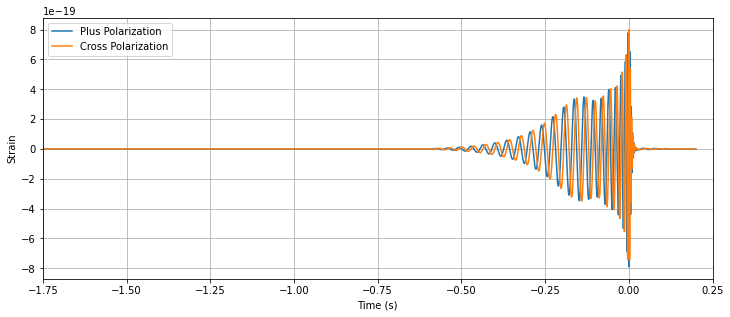

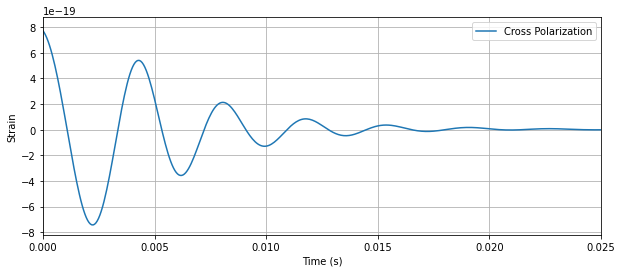

In [4]:
hp, hc = get_td_waveform(approximant="IMRPhenomXPHM",
                         mass1=36,
                         mass2=29,
                         delta_t=1.0/16384,
                         f_lower=30)

pylab.figure(figsize=pylab.figaspect(0.4))
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlim(-1.75, 0.25)
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.legend()
pylab.grid()
pylab.show()

pylab.figure(figsize=pylab.figaspect(0.4))
#pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.xlim(0, .025)
pylab.legend()
pylab.grid()
pylab.show()

#this waveform generated with masses from GW150914

In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import arviz as az
import seaborn as sns
import pandas as pd
sns.set(context='notebook', palette='colorblind')

In [6]:
# define sampling rate and duration (make these powers of two) 
fsamp = 8192
duration = 4
t0 = 0

delta_t = 1/fsamp
tlen = int(round(duration / delta_t))
epoch = t0 - 0.5*tlen*delta_t

time = np.arange(tlen)*delta_t + epoch

In [7]:
wf_kws = dict(
    A = 2,
    phi = 0,
    f = 250,
    gamma = 250,
)

def get_signal(time, A, phi, f, gamma):
    s = A*np.cos(2*np.pi*f*(time-t0) + phi)*math.exp(-gamma*abs(time-t0))
    return rd.Data(s, index=time)

signal = get_signal(time, **wf_kws)

################################################


signal.plot(label='signal')
axvline(t0, ls=':', c='k', label='start time')
xlim(-0.03, 0.03)
xlabel('time (s)')
ylabel('strain')
legend();

TypeError: only size-1 arrays can be converted to Python scalars

In [8]:
print(time)

[-2.         -1.99987793 -1.99975586 ...  1.99963379  1.99975586
  1.99987793]
